In [25]:
pip install scikit-image

In [26]:
pip install opencv-python

In [35]:
import cv2
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
# from skimage.color import rgb2grey
from skimage import exposure
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets

import tensorflow as tf
from tensorflow import keras

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
path='drive/MyDrive/data'


In [30]:
categories=['with_mask','without_mask']

In [31]:
# data=os.path.join(path,categories[0])
# data
# os.listdir(data)
# dataimage=os.path.join(data,os.listdir(data)[0])
# dataimage
# img=imread(imagePath)
# resized_img=resize(img,(128,64))
# if len(img.shape)>2:
#             fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
#                 	cells_per_block=(2, 2), visualize=True,multichannel=True)
# hog_image

In [22]:
featurelist=[]
target_arr=[]
# data=os.path.join(path,category[0])
for category in categories:
    data=os.path.join(path,category)
    for i in os.listdir(data):
        dataimage=os.path.join(data,i)
        if i=='.ipynb_checkpoints':
            continue
        imagePath=os.path.join(data,i)
#         print(imagePath)
        img=imread(imagePath)
        resized_img=resize(img,(128,64))
        if len(img.shape)>2:
            fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True,multichannel=True)
#             print(len(fd.shape))
        else:
            fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)
#             print(len(fd.shape))
        featurelist.append(fd)
#         print(cat)
        target_arr.append(category)
matrix=np.array(featurelist)
matrix1=np.array(target_arr)
df=pd.DataFrame(matrix)

df['target']= matrix1


<ipython-input-22-9df4c9df60f9>:15: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


In [23]:
print(df.shape)

(3231, 3781)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Columns: 3781 entries, 0 to target
dtypes: float64(3780), object(1)
memory usage: 93.2+ MB


In [40]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
Y = Y.replace('without_mask', 0)
Y = Y.replace('with_mask', 1)

X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
Y

(2584, 3780)
(647, 3780)
(2584,)
(647,)


0       1
1       1
2       1
3       1
4       1
       ..
3226    0
3227    0
3228    0
3229    0
3230    0
Name: target, Length: 3231, dtype: int64

In [36]:
# Creating a model

# Getting the input shape

input_shape = X_train.shape[1:]

model_1 = tf.keras.models.Sequential([

              # The first layer has 30 neurons(or units)
              tf.keras.layers.Dense(units=30, input_shape=input_shape, activation='relu'),

              # The second layer has 25 neurons

              tf.keras.layers.Dense(units=15, activation='relu'),

              # The third layer has 1 neuron and activation of sigmoid.
              # Because of sigmoid, the output of this layer will be a value bwteen 0 and 1
              tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model

model_1.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics='accuracy')


In [41]:
# By setting validation_split=0.15, I am allocating 15% of the dataset to be used for evaluating the model during the training
# Model training returns model history(accuracy, loss, epochs...)

history = model_1.fit(X_train, Y_train, epochs=60, validation_split=0.15)

Epoch 1/60
69/69 [==============================] - 1s 9ms/step - loss: 0.6579 - accuracy: 0.6257 - val_loss: 0.6540 - val_accuracy: 0.6031
Epoch 2/60
69/69 [==============================] - 0s 5ms/step - loss: 0.6247 - accuracy: 0.6412 - val_loss: 0.6249 - val_accuracy: 0.6521
Epoch 3/60
69/69 [==============================] - 0s 5ms/step - loss: 0.5888 - accuracy: 0.7054 - val_loss: 0.5978 - val_accuracy: 0.7036
Epoch 4/60
69/69 [==============================] - 0s 5ms/step - loss: 0.5521 - accuracy: 0.7664 - val_loss: 0.5661 - val_accuracy: 0.7552
Epoch 5/60
69/69 [==============================] - 0s 5ms/step - loss: 0.5128 - accuracy: 0.8078 - val_loss: 0.5270 - val_accuracy: 0.7938
Epoch 6/60
69/69 [==============================] - 0s 5ms/step - loss: 0.4711 - accuracy: 0.8374 - val_loss: 0.4960 - val_accuracy: 0.7938
Epoch 7/60
69/69 [==============================] - 0s 5ms/step - loss: 0.4282 - accuracy: 0.8529 - val_loss: 0.4701 - val_accuracy: 0.7964
Epoch 8/60
69/69 [==

<Axes: >

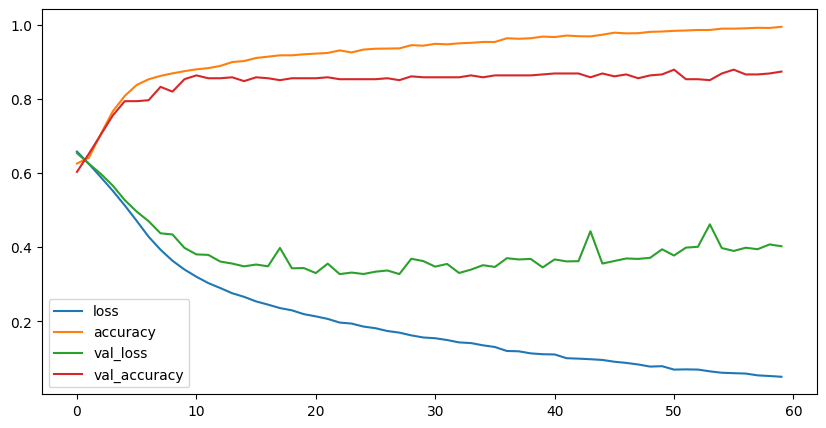

In [42]:
# Getting the dataframe of loss and accuracies on both training and validation

loss_acc_metrics_df = pd.DataFrame(history.history)
loss_acc_metrics_df.plot(figsize=(10,5))

In [43]:
# Evaluating a model on unseen data: test set

model_eval = model_1.evaluate(X_test, Y_test)

# Printing the loss and accuracy

print('Test loss: {}\nTest accuracy:{}'.format(model_eval[0],model_eval[1]))

21/21 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8578
Test loss: 0.41486990451812744
Test accuracy:0.8578052520751953


In [45]:
# ‼DON'T DO THIS!! X_test is not scaled. The results will be awful

model_1.evaluate(X_test, Y_test)

21/21 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8578


[0.41486990451812744, 0.8578052520751953]

In [50]:
# Getting the prediction

predictions = model_1.predict(X_test)
# Rounding the predictions to 0 and 1

predictions = tf.round(predictions)
predictions

21/21 [==============================] - 0s 5ms/step


<tf.Tensor: shape=(647, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
 

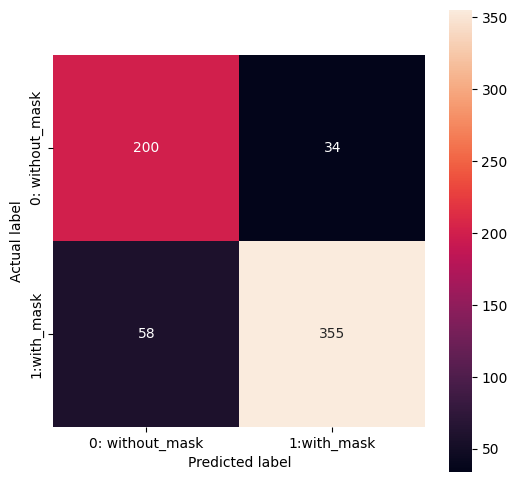

In [52]:
# Getting the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, predictions)

# Plotting confusion matrix

plt.figure(figsize=(6,6))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0: without_mask', '1:with_mask'],
                        yticklabels=['0: without_mask', '1:with_mask'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label');